In [4]:
import torch
import numpy as np

eigvals = torch.load('SOAP_533_[8]_center8_eigvals.pt')
eigvecs = torch.load('SOAP_533_[8]_center8_eigvecs.pt')
properties = torch.load('SOAP_533_[8]_center8_properties.pt')
cov = torch.load('SOAP_533_[8]_center8_cov1.pt')
N_CUM = 3

In [71]:
np.tile([1,2,3], (2, 1)).shape

(2, 3)

In [ ]:
A = [np.tile([1,2,3], (10, 1)),np.tile([11,12,13], (10, 1))] # cumulants 3 SOAP 2 
B = np.hstack(A)

In [80]:
print(B[0].shape)
C = B[0].reshape(-1,3).T
for c in C:
    print(c)

(6,)
[ 1 11]
[ 2 12]
[ 3 13]


In [14]:
cumulant_weights.shape

torch.Size([128, 5])

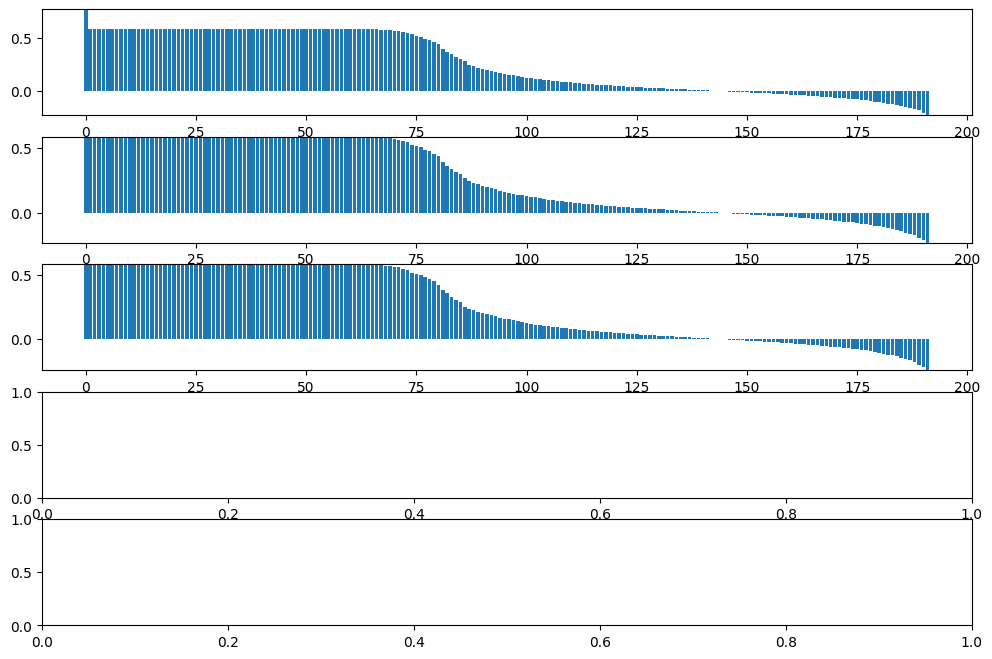

In [5]:
import matplotlib.pyplot as plt
cumulant_weights = eigvals.reshape(-1, N_CUM)
fig, axs = plt.subplots(5,1,figsize=(12,8))
ymin =  cumulant_weights.min()
ymax = cumulant_weights.max()
for i, cum in enumerate(cumulant_weights.T):
    axs[i].bar(range(len(cum)), cum)
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_ylim(cum.min(), cum.max())
plt.show()

In [56]:
eigvecs[:,0].shape

torch.Size([3200])

In [59]:
properties[635:645]

tensor([[8, 8, 3, 2, 3],
        [8, 8, 3, 3, 0],
        [8, 8, 3, 3, 1],
        [8, 8, 3, 3, 2],
        [8, 8, 3, 3, 3]], dtype=torch.int32)

In [43]:
properties

tensor([[1, 1, 0, 0, 0],
        [1, 1, 0, 0, 1],
        [1, 1, 0, 0, 2],
        ...,
        [8, 8, 3, 3, 1],
        [8, 8, 3, 3, 2],
        [8, 8, 3, 3, 3]], dtype=torch.int32)

<BarContainer object of 640 artists>

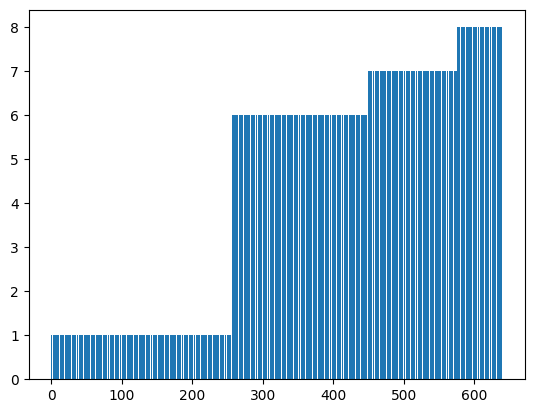

In [60]:
properties.shape
y = properties[:,0]
plt.bar(range(len(y)), y)

In [36]:
cumulant_weights.shape

torch.Size([128, 5])

In [63]:
properties.shape

torch.Size([640, 5])

0
1
2


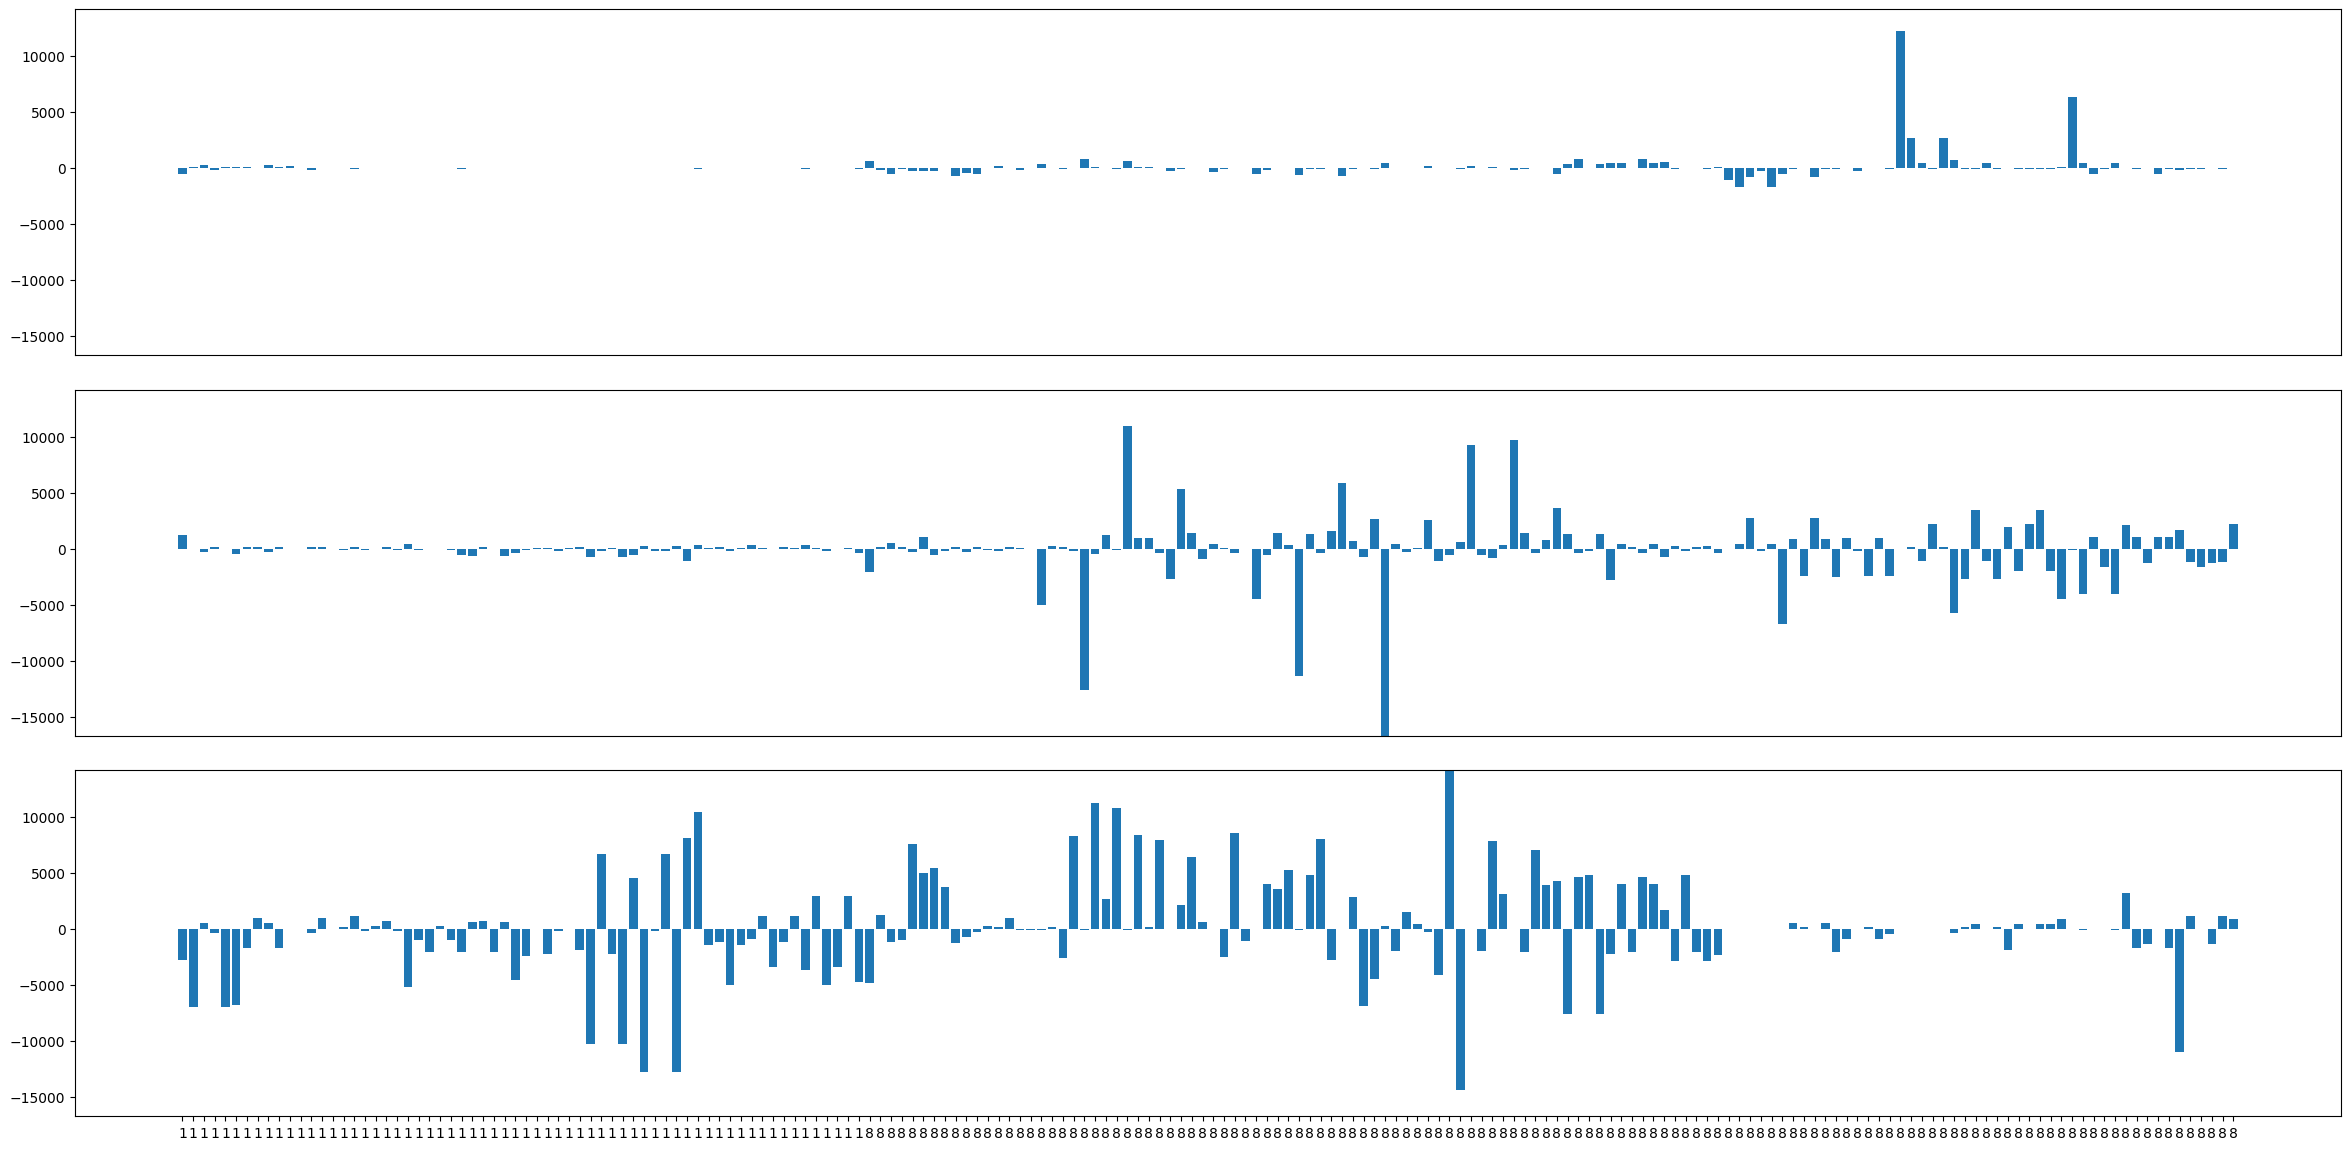

In [16]:
fig, axs = plt.subplots(N_CUM,1,figsize=(24,12))
cumulant_weights = eigvecs[:,0].reshape(-1,N_CUM)
#cumulant_weights_t = eigvecs[:,0].reshape(N_CUM, -1)
ymin =  cumulant_weights.min()
ymax = cumulant_weights.max()
positions = np.arange(0,cumulant_weights.shape[0])
#positions = np.arange(0,cumulant_weights_t.shape[1])
labels = properties.numpy()

for i, cum in enumerate(cumulant_weights.T):
    print(i)
    axs[i].bar(range(len(cum)), cum)
    axs[i].set_ylim(ymin, ymax)

    if i < cumulant_weights.shape[1] - 1:
        axs[i].set_xticks([])
    else:
        axs[i].set_xticks(positions, labels[:,1])#, rotation=90, ha='right')
    #axs[i].set_ylim(cum.min(), cum.max())
plt.tight_layout(pad=2.5)   # increase pad (default ≈1.08)
plt.show()

In [ ]:
def top5_rows(matrix):
    """
    Returns the row indices of the 5 largest elements in a 2D array.
    """
    # Flatten the matrix
    flat_idx = np.argpartition(matrix.flatten(), -5)[-5:]
    
    # Convert flattened indices back to 2D indices
    rows, cols = np.unravel_index(flat_idx, matrix.shape)
    
    # Return row indices as a list
    return list(rows)


idx = top5_rows(cumulant_weights_t.T)
print(idx)
print([labels[i] for i in idx])

[np.int64(71), np.int64(73), np.int64(65), np.int64(164), np.int64(96)]
[array([1, 8, 0, 1, 3], dtype=int32), array([1, 8, 0, 2, 1], dtype=int32), array([1, 8, 0, 0, 1], dtype=int32), array([8, 8, 2, 1, 0], dtype=int32), array([1, 8, 2, 0, 0], dtype=int32)]


/tmp/openmpi/ipykernel_43278/423189660.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  rows, cols = np.unravel_index(flat_idx, matrix.shape)


In [15]:
print(idx)
print([labels[i] for i in idx])

[np.int64(71), np.int64(73), np.int64(65), np.int64(164), np.int64(96)]
[array([1, 8, 0, 1, 3], dtype=int32), array([1, 8, 0, 2, 1], dtype=int32), array([1, 8, 0, 0, 1], dtype=int32), array([8, 8, 2, 1, 0], dtype=int32), array([1, 8, 2, 0, 0], dtype=int32)]


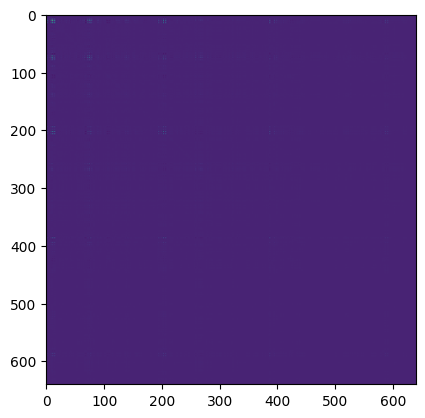

In [18]:
cov = torch.load('SOAP_533_[6]_center6_cov1.pt')
plt.imshow(cov)